# Assignment 2 

This assignment mainly enhance your Exploratory Data Analysis Skills. The total mark for this assignment is 40. Answer the questions in the code chrunk and 
fill up the missing part of the code. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from scipy.special import inv_boxcox
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [4]:
# ## read the datset from your local drive
# from google.colab import files
# upload = files.upload()
#Not necessary because using VSCODE for editor

In [5]:
## upload the dataset
import pandas as pd
df = pd.read_csv('train.csv')

In [6]:
## functions that you can use to learn your dataset 
df.head(5)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#####################################################################
### Exploratory Data Analysis #######################################
# 1. ToDo ###########################################################
#### Answer: Why do I separate continuous and categorical features?
# This is to help with pre-processing things we will be doing. Separating by datatype makes it easier to handle
# 1 point
#####################################################################
# Creating dataframe for numeric and categorical features separately 
# make a note of the select_dtypes() function, very useful
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])

In [8]:
############ToDo####################################################
## 1 points
## find out the feature names of the continuous and categorical var 
## find out the dimension of numeric_df and categorical_df

print('numerical df \n',numeric_df.columns, '\n categorical df\n',
categorical_df.columns)



numerical df 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
 categorical df
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'B

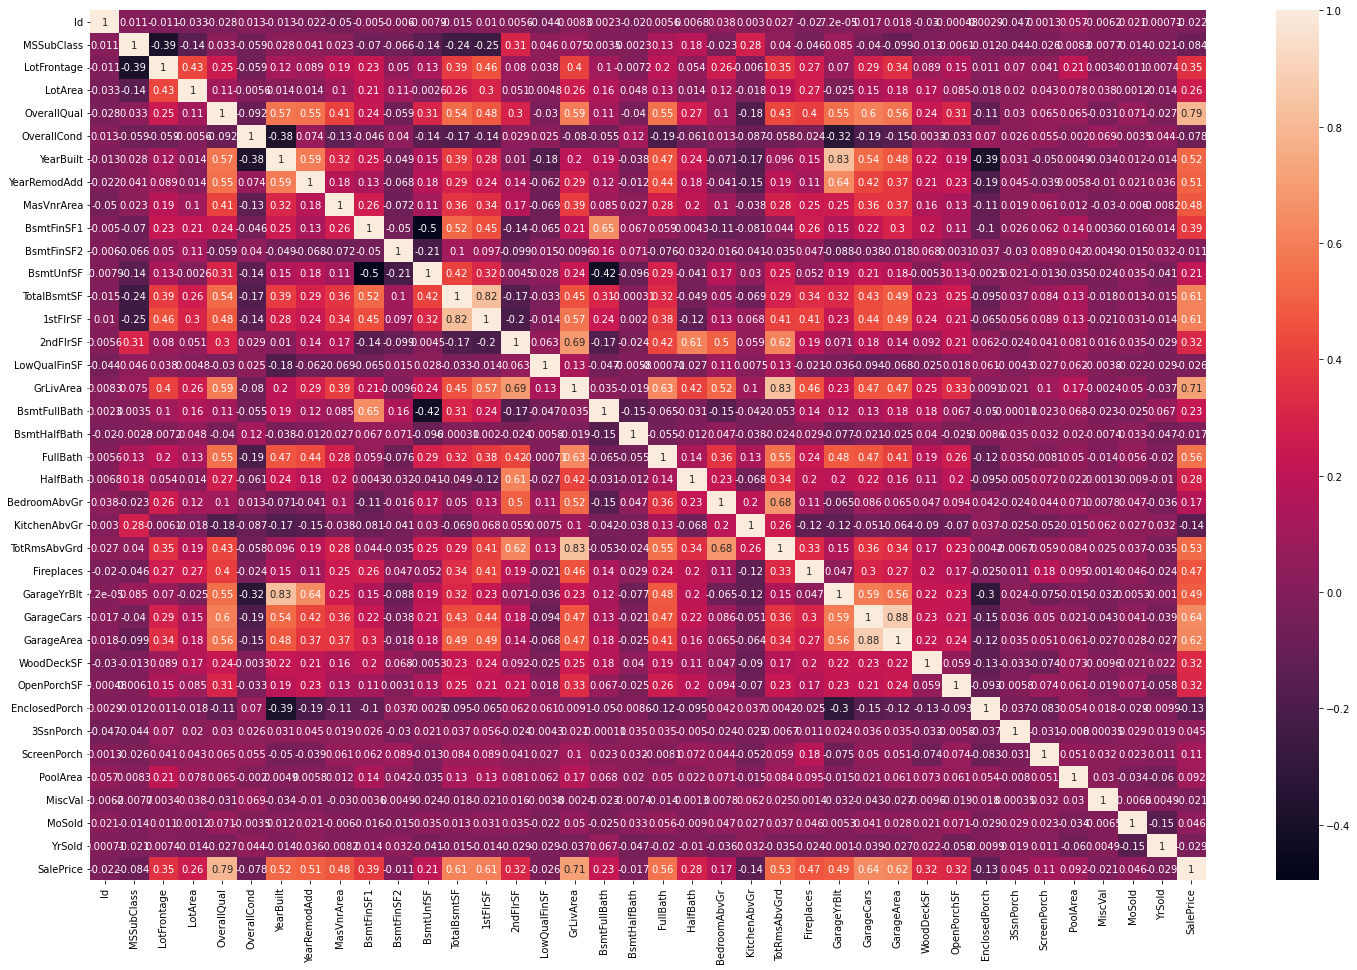

In [9]:
######## In linear regression ######################################
## 6 points
### for continuous variables, what should I check first?
### Last time we mentioned that two situations will lead to fitting
### problems for LR, what are they?
### 1. Matrix is not invertible - some of the continuous variables are in a perfect linear relationship --> separate to check for high correlation, if they exist, remove one of the features from the pair      
### 2. See if number of samples is bigger than the number of features
### How to check 1 ?  What visualization technique can you use? ---> we can look for the correlation b/t pairs
## Use the visualiation technique to create this graph
# --> we can use a heatmap
### Answer my previous question and write down the code below
plt.figure(figsize=(25,16))
## fill out the misssing code here 
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

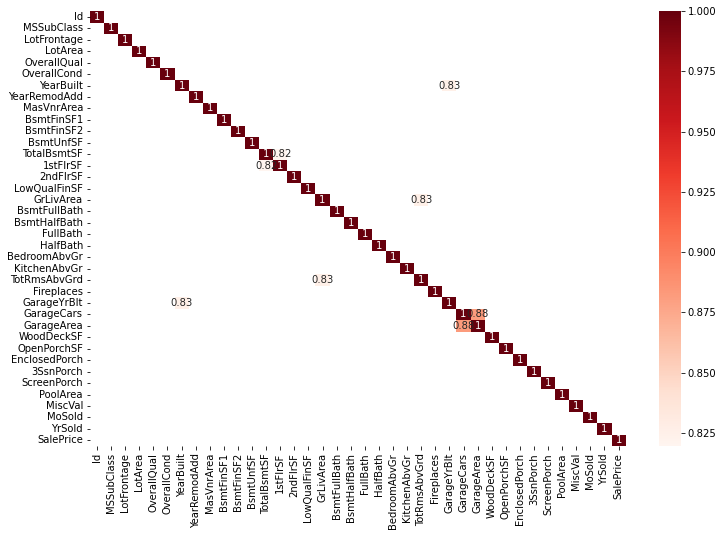

In [10]:
# How to show pairs with correlation bigger than 0.7 in heat map
correlation = numeric_df.corr()

kot = correlation[correlation>=.8] #looking for correlation above .8 (high correlation pairs--> MC)
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds", annot = True)
plt.show()

In [11]:
############ToDo###################################################
## 3 points
## What information can you learn from the plot?
##      - We can see which pairs of variables are highly correlated (multicolinearity)
## Which pairs of variables demonstrate high correlation?
##      - The pairs indicated by a value on the above correlation graph indicate high correlation (greater than .8)
## E.g. Pair 1 - yearBuilt and garageYrBlt
##


## What should we do about them?  Should we keep them or remove them?
## It would be wise to remove them, or to make a linear combination of the variables

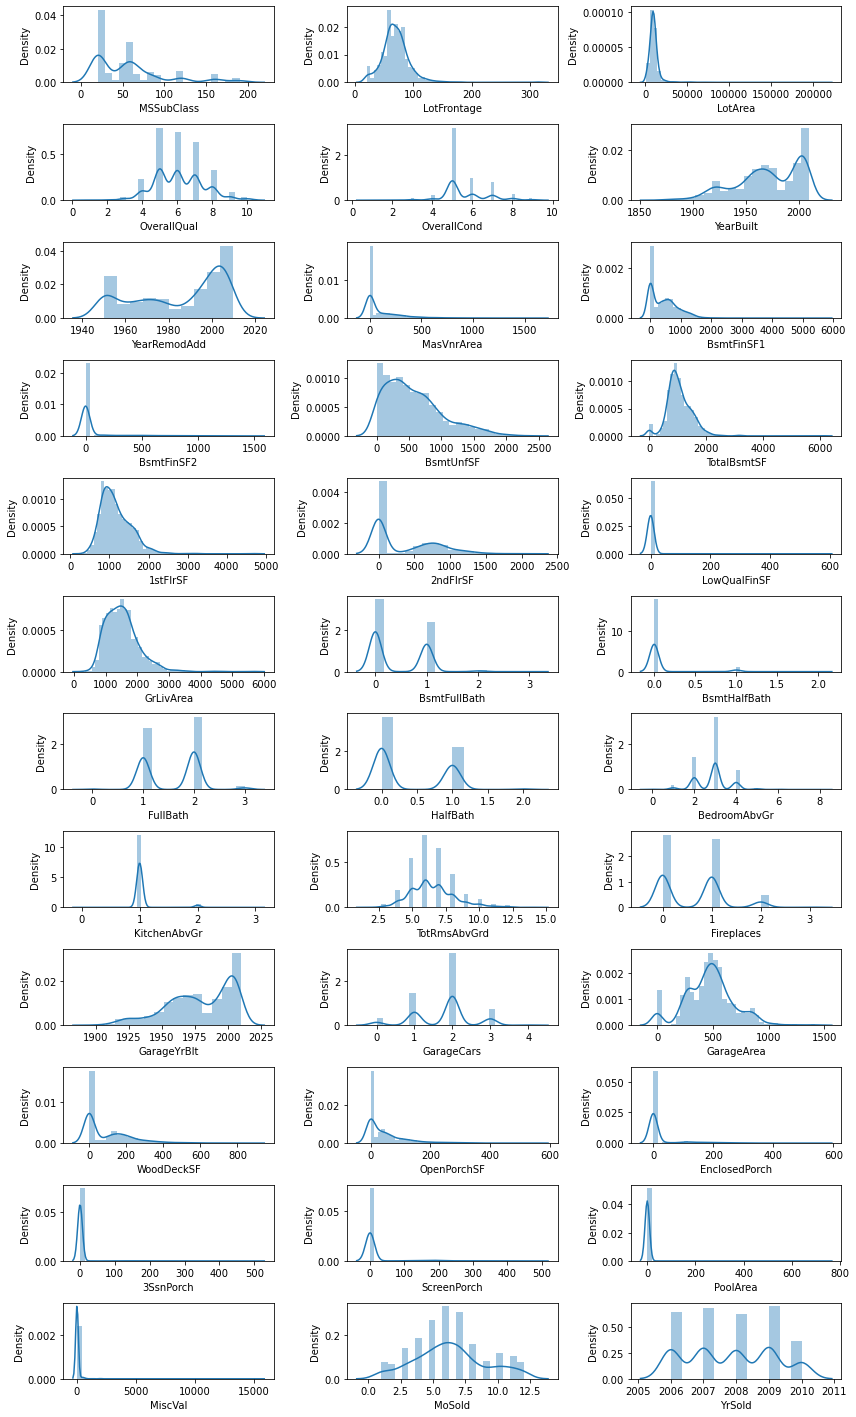

In [12]:
###################################################################
##### Univariate Data Analysis ####################################
fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['Id', 'SalePrice']:
        i+=1
        plt.subplot(13, 3, i)
        sns.distplot(df[feature])
        plt.tight_layout()

# 5 points

- What can you learn from the plot?
    * We can see the distribution of values for our variables

- Are they are continuous variables?
    - Not all of them are continuous variables
- If not, which ones are categorical variables?

- Do you find some variables that only have one unique value?
    - Yes, graphs containing 1 bar indicate a variable that only has one unique value. For example, ScreenPorch
    
- Are there any potential problems with this when you fit linear regression



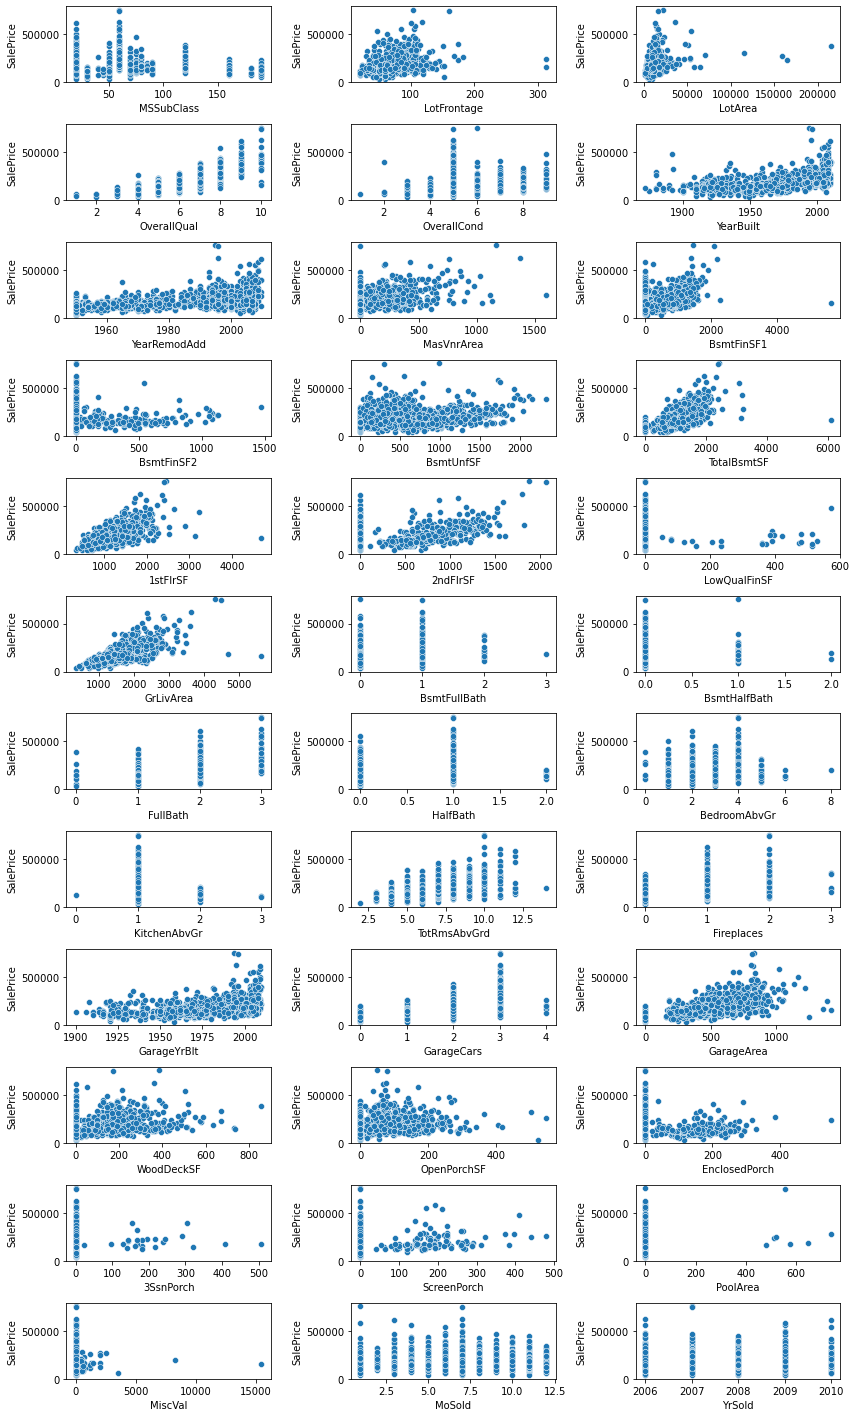

In [16]:
## ToDO #############################################################
## Answer the below questions and fill up the code
## 6 points
######### How to find if each univariate variable has strong correlation with
######### the target variable?
### What visualization technique should you use to explore this?
## We are using a scatterplot to explore this
### create the plot here 

fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['Id', 'SalePrice']:
        i+=1
        plt.subplot(13, 3, i)
        ## fill out the misssing code here 
        sns.scatterplot(df[feature], df['SalePrice'])       

        plt.tight_layout()

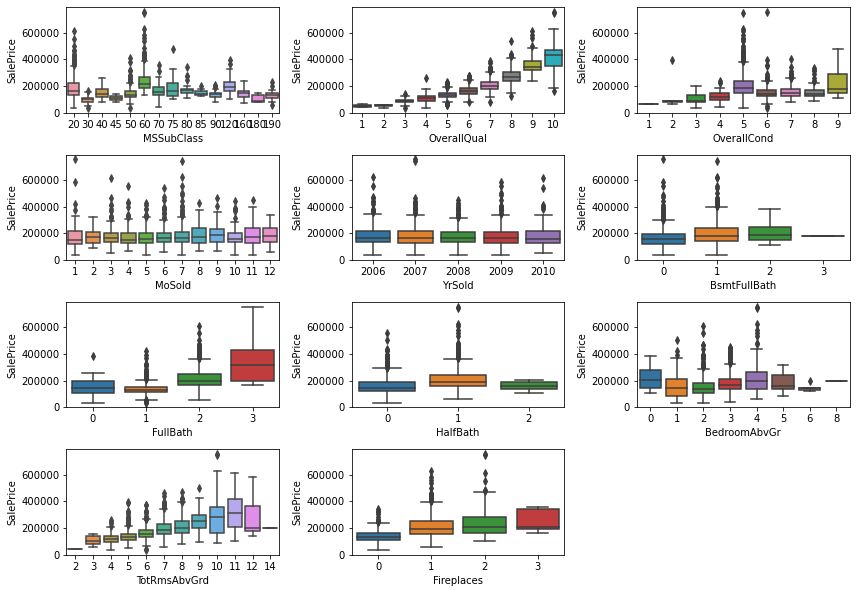

In [17]:
#######ToDo###################################################
## 6 points
## Fill up the code and answer the questions "What can you learn from the graph"
### Since there are categorical variable in the scatter plot,
### To learn the relationship between the categorical variable and the target
### Which visualization technique is more appropriate other than the plot we use
### in the previous code chrunk
###['MSSubClass','OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces']

fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass','OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces']):
    plt.subplot(6, 3, i+1)
    ## Which graph should I use
    ## fill up the code below
    sns.boxplot(df[feature],df['SalePrice'])
    plt.tight_layout()

### What can you learn from the graph?
### 1. 'OverallQual' - significant (keep)
### 2. 'OverallCond' - significant (keep)
### 3. 'MoSold' and 'YrSold':- not significant (stay level over time)
### 4. 'FullBath' = 3 and 'HalfBath' = 1 ---> potential outlier?
### 5. 'TotRmsAbvGrd' - significant (keep)

In [18]:
# Converting the year related features into number of years
for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    df[feature] = 2022 - df[feature]

In [19]:
### Find the categorical variable names
categorical_df.columns.sort_values()

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [ ]:
### So many variables, can I put some of the variables into different subclasses?
bsmt_df = categorical_df[['BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'BsmtQual']]
garage_df = categorical_df[['GarageCond','GarageFinish', 'GarageQual', 'GarageType']]
sale_df = categorical_df[['SaleCondition', 'SaleType']]
exterior_df = categorical_df[['ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd']]
heating_df = categorical_df[['Heating', 'HeatingQC','Electrical','FireplaceQu']]
land_df = categorical_df[['LandContour', 'LandSlope', 'Street', 'Alley','PavedDrive', 'Fence']]

In [ ]:
##########ToDO##################################################################
## 6 points
## fill up the code and answer the question below
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(bsmt_df.columns):
    plt.subplot(3, 2, i+1)

    ## fill up the code below
    
    plt.tight_layout()    

#### What can we learn from the characteristics of the basements in all the houses?
#### Answer this question
#### If you do not understand the meaning of the variable, check up your data 
#### dictionary.




In [ ]:
### ToDO ###########################################################################
#### Fill up the code below and anser the questions
#### 6 points
### How do you examine the relationship between sale price and all basedment related variables?
### Which data visualization technique is appropriate?

fig=plt.subplots(figsize=(10,10))

for i,col in enumerate(bsmt_df.columns):
    plt.subplot(3, 2, i+1)
    ## fill up the code here 


    plt.tight_layout()